# Topic 25-Pt 1: Intro to Logistic Regression 

- onl01-dtsc-ft-022221
- 05/06/21

## Announcements

- Blog Post Deadline Extended until Monday at 10 AM EST.

## Overview

- For Today:
    - Types of machine learning.
        - Supervised vs Unsupervised Learning
        - Regression vs Classification 
    - From Linear to Logistic Regression - Theory
    - Applying Logistic Regression with `scikit-learn`
        - Proper preprocessing with train-test-split.
    - Evaluating Classifiers
        - Confusion Matrices
        - Accuracy, ~~Precision, Recall, F1-Score~~



- For Next Class:
    - Classification Metrics 
        - Confusion Matrices
        - Accuracy, Precision, Recall, F1-Score
        - ROC-AUC curve
    - Class Imbalance Problems
    - Functionizing evaluating classification models

## Questions?

-  Given that we are not using R^2 in our cost function, what metric are we using in our cost function? Additionally, is gradient descent being used to minimize this cost function? 

# Types of Machine Learning Models

<img src="https://raw.githubusercontent.com/jirvingphd/fsds_pt_100719_cohort_notes/master/Images/ai_machine_learning_deep_learning.png">

## Intro to Supervised Learning

> "The term **_Supervised Learning_** refers to a class of machine learning algorithms that can "learn" a task through **_labeled training data_**."

<img src="https://raw.githubusercontent.com/jirvingphd/dsc-intro-to-supervised-learning-v2-1-online-ds-pt-100719/master/images/new_ml-hierarchy.png" width=60%>

- All machine learning models fall into one of two categories:
    - Regressors/Regression
    - Classifiers/Classification

### Regression

Trying to find the **relationship** and predict a specific value.

- Examples of regressions:
    - House prices
    - Salary
    - Reviews/Ratings

### Classification

Trying to identify what features can predict which class a particular observation/row belongs to.
- Can be a "binary classification" 
    - "yes" or "no"
    - Survived or died.
    - Diabetic or not-diabetic
- Can also be a "multiclass classification"
    - Which type of flower?
    - Will a football game end one team winning, or the other team, or a tie?


# From Linear Regression to Logistic Regression


<img src="https://raw.githubusercontent.com/jirvingphd/online-dtsc-pt-041320-cohort-notes/master/assets/images/logistic_vs_linear.jpg">

## Recall Linear Regression

### Formula

$$ \large \hat y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \ldots + \beta_n x_n = \sum_{i=0}^{N} \beta_i x_i $$

- Output is specifying the **predicted value** for the target

## Classification: Use Logistic Regression

- Output is specifying the **probability** of belonging to a particular group

- Visual Example:
    - https://www.desmos.com/calculator/y2ilpxiqys

Transform from linear regression!

$$ \large \hat y = \sum_{i=0}^{N} \beta_i x_i $$

$$\large P = \displaystyle \frac{1}{1+e^{-\hat y}} = \frac{1}{1+e^{-\sum_{i=0}^{N} \beta_i x_i}} $$

$$ \large = \frac{1}{1+e^{-\beta_0}e^{-\beta_1 x_1}\ldots e^{-\beta_N x_N}} $$

# Implementing Logistic Regression

## Predict Passenger Survival on the Titanic with `scikit-learn`

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,StandardScaler,OneHotEncoder
from sklearn.impute import SimpleImputer

from sklearn.linear_model import Lasso, Ridge, LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn import metrics 


# import statsmodels.api as sm

In [2]:
url = "https://raw.githubusercontent.com/jirvingphd/dsc-dealing-missing-data-lab-online-ds-ft-100719/master/titanic.csv"
df = pd.read_csv(url,index_col=0,na_values='?')
relevant_columns = ['Pclass', 'Age', 'SibSp', 'Fare', 'Sex', 'Embarked', 'Survived']
df = df[relevant_columns]
df.head()

,Pclass,Age,SibSp,Fare,Sex,Embarked,Survived
0,3.0,22.0,1,7.2500,male,S,0
1,1.0,38.0,1,71.2833,female,C,1
2,3.0,26.0,0,7.9250,female,S,1
3,1.0,35.0,1,53.1000,female,S,1
4,3.0,35.0,0,8.0500,male,S,0


In [3]:
df['Survived'].value_counts(normalize=True,dropna=False)

0    0.616162
1    0.383838
Name: Survived, dtype: float64

Text(0.5, 0.98, 'X Features vs Survived')

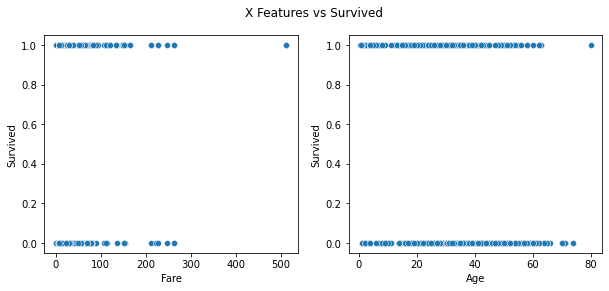

In [4]:
fig,ax= plt.subplots(ncols=2,figsize=(10,4))
sns.scatterplot(data=df, x='Fare',y='Survived',ax=ax[0])
sns.scatterplot(data=df, x='Age',y='Survived',ax=ax[1])
fig.suptitle('X Features vs Survived')

Text(0.5, 0.98, 'X Features vs Survived - Regression')

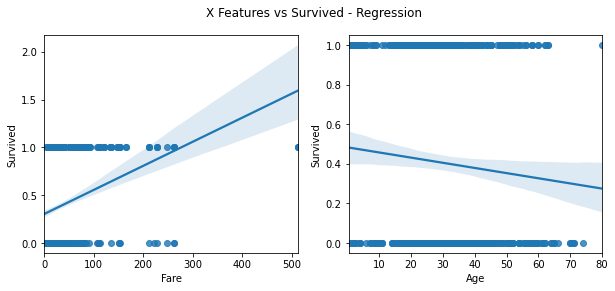

In [5]:
fig,ax= plt.subplots(ncols=2,figsize=(10,4))
sns.regplot(data=df, x='Fare',y='Survived',ax=ax[0])
sns.regplot(data=df, x='Age',y='Survived',ax=ax[1])
fig.suptitle('X Features vs Survived - Regression')

### Q: What are the preprocessing steps I need to perform before I create the model?

- Recast data types
- Train-test-split
- Fill/drop in missing/null values
- Feature Selection / Feature Engineering (interaction terms)
- Handling categorial variables
    - One Hot Encoding 
    - Label Encoding
- Handling Outliers (maybe)
- Normalizing/Standardizing our data

- **Multicollinearity (does it still matter as much for Logistic?)**



In [6]:
## Check out the .info
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    842 non-null    float64
 1   Age       714 non-null    float64
 2   SibSp     891 non-null    int64  
 3   Fare      891 non-null    float64
 4   Sex       891 non-null    object 
 5   Embarked  889 non-null    object 
 6   Survived  891 non-null    int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 55.7+ KB


In [7]:
## Check Object cols value_counts
display(df['Embarked'].value_counts(dropna=False),
        df['Sex'].value_counts(dropna=False))

S      644
C      168
Q       77
NaN      2
Name: Embarked, dtype: int64

male      577
female    314
Name: Sex, dtype: int64

### Preprocessing

In [8]:
## Separate X and y and train-test-split
target = 'Survived'

y = df[target]
X = df.drop(target, axis=1)

# Perform test train split
X_train , X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,)


In [9]:
## Check for nulls in training set
X_train.isna().sum()

Pclass       32
Age         137
SibSp         0
Fare          0
Sex           0
Embarked      1
dtype: int64

In [10]:
df['Pclass'].value_counts(normalize=True,dropna=False)

3.0    0.526375
1.0    0.225589
2.0    0.193042
NaN    0.054994
Name: Pclass, dtype: float64

In [11]:
df['Embarked'].value_counts(normalize=True,dropna=False)

S      0.722783
C      0.188552
Q      0.086420
NaN    0.002245
Name: Embarked, dtype: float64

In [12]:
pclass_counts = dict(X_train['Pclass'].value_counts(normalize=True))
pclass_counts

{3.0: 0.5549915397631133, 1.0: 0.24196277495769883, 2.0: 0.20304568527918782}

In [13]:
# X_train.loc[X_train['Pclass'].isna()==True,"Pclass"] = X_train.loc[X_train['Pclass'].isna()==True]["Pclass"].map(
#     lambda x: np.random.choice(list(pclass_counts.keys()),
#                                                   p=list(pclass_counts.values())))
# X_train.isna().sum()

In [14]:
X_train['Pclass'].value_counts()

3.0    328
1.0    143
2.0    120
Name: Pclass, dtype: int64

In [15]:
SimpleImputer()

SimpleImputer()

In [16]:
## Specify which values to impute with which method

## Most frequent
mode_cols =['Pclass','Embarked']
## Fill with median
median_cols = ['Age']


In [17]:
## Copying X_train and X_test as start of X_train_tf,X_test_tf
X_train_tf = X_train.copy()
X_test_tf = X_test.copy()

In [18]:
## Impute the columns with most-frequent value
impute_mode = SimpleImputer(strategy='most_frequent')
X_train_tf[mode_cols] = impute_mode.fit_transform(X_train_tf[mode_cols])
X_test_tf[mode_cols] = impute_mode.transform(X_test_tf[mode_cols])
## Verify it worked
X_train_tf.isna().sum()

Pclass        0
Age         137
SibSp         0
Fare          0
Sex           0
Embarked      0
dtype: int64

In [19]:
## Impute the columns with most-frequent value
impute_median = SimpleImputer(strategy='median')
X_train_tf[median_cols] = impute_median.fit_transform(X_train_tf[median_cols])
X_test_tf[median_cols] = impute_median.transform(X_test_tf[median_cols])
## Verify it worked
X_train_tf.isna().sum(), X_test_tf.isna().sum()

(Pclass      0
 Age         0
 SibSp       0
 Fare        0
 Sex         0
 Embarked    0
 dtype: int64,
 Pclass      0
 Age         0
 SibSp       0
 Fare        0
 Sex         0
 Embarked    0
 dtype: int64)

In [20]:
X_train_tf['Pclass'] = X_train_tf['Pclass'].astype(str)
X_test_tf['Pclass'] = X_test_tf['Pclass'].astype(str)

X_train_tf

,Pclass,Age,SibSp,Fare,Sex,Embarked
319,1.0,40.00,1,134.5000,female,C
684,2.0,60.00,1,39.0000,male,S
220,3.0,16.00,0,8.0500,male,S
741,1.0,36.00,1,78.8500,male,S
745,3.0,70.00,1,71.0000,male,S
...,...,...,...,...,...,...
803,3.0,0.42,0,8.5167,male,C
201,3.0,28.00,8,69.5500,male,S
600,2.0,24.00,2,27.0000,female,S
228,2.0,18.00,0,13.0000,male,S


In [21]:
## Specifing which cols to encode and which to scale.
#  make cat_cols and num_cols
cat_cols = X_train_tf.select_dtypes('O').columns
num_cols = X_train_tf.select_dtypes('number').columns
num_cols,cat_cols

(Index(['Age', 'SibSp', 'Fare'], dtype='object'),
 Index(['Pclass', 'Sex', 'Embarked'], dtype='object'))

In [22]:
## Encode cat_cols
encoder = OneHotEncoder(sparse=False,drop='first')
train_cat_cols = encoder.fit_transform(X_train_tf[cat_cols])
test_cat_cols = encoder.transform(X_test_tf[cat_cols])
train_cat_cols

array([[0., 0., 0., 0., 0.],
       [1., 0., 1., 0., 1.],
       [0., 1., 1., 0., 1.],
       ...,
       [1., 0., 0., 0., 1.],
       [1., 0., 1., 0., 1.],
       [0., 1., 1., 0., 1.]])

In [23]:
train_cat_cols = pd.DataFrame(train_cat_cols,columns=encoder.get_feature_names(cat_cols))
test_cat_cols =  pd.DataFrame(test_cat_cols,columns=encoder.get_feature_names(cat_cols))
test_cat_cols

,Pclass_2.0,Pclass_3.0,Sex_male,Embarked_Q,Embarked_S
0,0.0,0.0,1.0,0.0,0.0
1,1.0,0.0,0.0,0.0,1.0
2,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...
263,0.0,1.0,1.0,0.0,1.0
264,0.0,0.0,0.0,0.0,1.0
265,0.0,1.0,1.0,0.0,1.0
266,0.0,1.0,1.0,0.0,1.0


In [24]:
## Scaling Num_cols
scaler = StandardScaler()
train_num_cols = pd.DataFrame(scaler.fit_transform(X_train_tf[num_cols]),
                              columns=num_cols)
test_num_cols =  pd.DataFrame(scaler.transform(X_test_tf[num_cols]),
                              columns=num_cols)
train_num_cols

,Age,SibSp,Fare
0,0.829971,0.458689,2.067304
1,2.378322,0.458689,0.133516
2,-1.028050,-0.469114,-0.493193
3,0.520301,0.458689,0.940442
4,3.152497,0.458689,0.781487
...,...,...,...
618,-2.234216,-0.469114,-0.483743
619,-0.099040,6.953308,0.752126
620,-0.408710,1.386492,-0.109473
621,-0.873215,-0.469114,-0.392960


In [25]:
## Combine Num and Cat Cols
X_train_tf = pd.concat([train_num_cols,train_cat_cols],axis=1)
X_test_tf = pd.concat([test_num_cols,test_cat_cols],axis=1)
X_test_tf

,Age,SibSp,Fare,Pclass_2.0,Pclass_3.0,Sex_male,Embarked_Q,Embarked_S
0,-0.408710,-0.469114,0.947530,0.0,0.0,1.0,0.0,0.0
1,-0.640963,-0.469114,-0.443583,1.0,0.0,0.0,0.0,1.0
2,-1.182886,0.458689,-0.047292,1.0,0.0,0.0,0.0,0.0
3,1.758981,0.458689,0.956642,0.0,0.0,1.0,0.0,1.0
4,-0.873215,0.458689,3.950975,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
263,-0.176457,-0.469114,-0.514961,0.0,1.0,1.0,0.0,1.0
264,0.829971,-0.469114,2.451277,0.0,0.0,0.0,0.0,1.0
265,0.210630,0.458689,-0.335250,0.0,1.0,1.0,0.0,1.0
266,0.442883,-0.469114,-0.513442,0.0,1.0,1.0,0.0,1.0


In [26]:
X_train_tf.describe().round(2)


,Age,SibSp,Fare,Pclass_2.0,Pclass_3.0,Sex_male,Embarked_Q,Embarked_S
count,623.00,623.00,623.00,623.00,623.00,623.00,623.00,623.00
mean,-0.00,-0.00,-0.00,0.19,0.58,0.63,0.09,0.72
std,1.00,1.00,1.00,0.39,0.49,0.48,0.28,0.45
min,-2.23,-0.47,-0.66,0.00,0.00,0.00,0.00,0.00
25%,-0.56,-0.47,-0.50,0.00,0.00,0.00,0.00,0.00
50%,-0.10,-0.47,-0.36,0.00,1.00,1.00,0.00,1.00
75%,0.40,0.46,-0.02,0.00,1.00,1.00,0.00,1.00
max,3.46,6.95,9.72,1.00,1.00,1.00,1.00,1.00


## Fitting a Logistic Regression with `scikit-learn`

In [27]:
## Fit a logistic regression model with defaults
log_reg = LogisticRegression(C=1e12)
log_reg.fit(X_train_tf,y_train)

LogisticRegression(C=1000000000000.0)

> ### But how do we know how GOOD it is?

In [28]:
## Check the .score of the model
log_reg.score(X_train_tf,y_train)

0.8073836276083467

In [29]:
## Get the model's .score for training and test set 
print(f"Training Score:\t{log_reg.score(X_train_tf,y_train):.2f}")
print(f"Test Score:\t{log_reg.score(X_test_tf,y_test):.2f}")

Training Score:	0.81
Test Score:	0.77


> But what "score" is this?

In [30]:
## Get Predictions for training and test data to check metrics functions
y_hat_train = log_reg.predict(X_train_tf)
y_hat_test = log_reg.predict(X_test_tf)

In [31]:
## is it r-squared?
metrics.r2_score(y_train,y_hat_train,)

0.18793856314223034

> Hmmm...its not $R^{2}$

In [32]:
## Try root_mean_square_error
metrics.mean_squared_error(y_train,y_hat_train,squared=False)

0.4388808179809791

> Hmmm...its not $\text{RMSE}$

In [33]:
## Try accuracy_score
metrics.accuracy_score(y_train,y_hat_train)

0.8073836276083467

> Ah-ha! The default `.score` for a classification model is **accuracy**. 

In [34]:
### Getting our model's coefficients
## Our function from last class
def get_coefficients(model,X_train):
    coeffs = pd.Series(model.coef_.flatten(), index=X_train.columns)
    coeffs['intercept'] = model.intercept_[0]
    return coeffs

In [35]:
y_train_proba = log_reg.predict_proba(X_train_tf)
# y_train_proba.argmax(axis=1)


In [36]:
## get the model's coefficients
get_coefficients(log_reg,X_train_tf)

Age          -0.415237
SibSp        -0.407622
Fare          0.339712
Pclass_2.0   -0.397551
Pclass_3.0   -1.439815
Sex_male     -2.656964
Embarked_Q   -0.222431
Embarked_S   -0.404273
intercept     2.256955
dtype: float64

### Understanding Our Model's Mistakes

- For classification tasks, it can be extremely helpful to examine a "Confusion Matrix" to understand how our model is wrong. 

In [37]:
## Use metrics.confusion_matrix
metrics.confusion_matrix(y_test,y_hat_test)

array([[149,  18],
       [ 43,  58]])

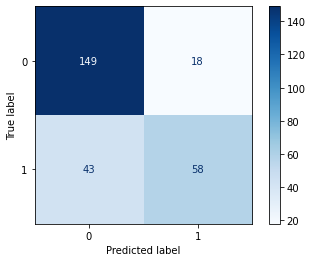

In [38]:
## Use metrics.plot_confusion_matrix
metrics.plot_confusion_matrix(log_reg, X_test_tf,y_test,cmap='Blues')#,
#                              display_labels=["Died",'Survived'])

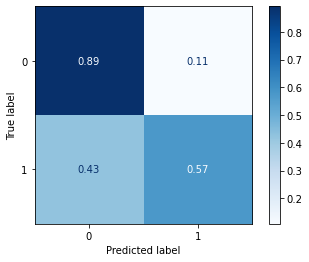

In [39]:
metrics.plot_confusion_matrix(log_reg, X_test_tf,y_test,cmap='Blues',normalize='true')#,


>- The Confusion Matrix separated out the correct (true) predictions for the positive class (1) and negative class (0). 

- **_True Positives (TP)_**: The number of observations where the model predicted the person has the disease (1), and they actually do have the disease (1).

- **_True Negatives (TN)_**: The number of observations where the model predicted the person is healthy (0), and they are actually healthy (0).

- **_False Positives (FP)_**: The number of observations where the model predicted the person has the disease (1), but they are actually healthy (0). 

- **_False Negatives (FN)_**: The number of observations where the model predicted the person is healthy (0), but they actually have the disease (1).


In [40]:
## Remake the conf matrix (raw counts)
cm = metrics.confusion_matrix(y_test,y_hat_test)
cm

array([[149,  18],
       [ 43,  58]])

```
[TN,FP],
[FN,TP]
```

In [41]:
## SLice out TN/FP/etc from cm
TN = cm[0,0]
FP = cm[0,1]
FN = cm[1,0]
TP = cm[1,1]

In [42]:
## Make sure we got the order right
print(TN,FP)
print(FN,TP)

149 18
43 58


### Classification Metrics are based on the confusion matrices of our model

#### Accuracy

$$ \large \text{Accuracy} = \frac{\text{Number of True Positives + True Negatives}}{\text{Total Observations}} $$

> "Out of all the predictions our model made, what percentage were correct?"
- "Accuracy is the most common metric for classification. It provides a solid holistic view of the overall performance of our 
model."

#### When to use?
- **Accuracy** is good for non-technical audiences (but can be misleading with imbalanced classes)


In [43]:
## calcualte accuracy manually
acc = (TP+TN)/(TP+TN+FP+FN)
acc

0.7723880597014925

In [44]:
## compare against the accuracy_score
metrics.accuracy_score(y_test,y_hat_test)

0.7723880597014925

### How do I know if my accuracy score is good?

> Does your model predict better than chance/just getting the class distribution?
- Compare your accuracy to your normalized value counts for y
- Compare your model against a `DummyClassifier` (https://scikit-learn.org/stable/modules/generated/sklearn.dummy.DummyClassifier.html)

In [45]:
## Check the class balance for the y_train
y_train.value_counts(normalize=True)

0    0.613162
1    0.386838
Name: Survived, dtype: float64

In [46]:
## Check the class balance for y_test
y_test.value_counts(normalize=True)

0    0.623134
1    0.376866
Name: Survived, dtype: float64

In [47]:
from sklearn.dummy import DummyClassifier
## Make and fit  dummy classifier
model = DummyClassifier(strategy='stratified')
model.fit(X_train_tf,y_train)
model.score(X_test_tf,y_test)

0.5074626865671642

In [48]:
## Get the model's .score
print(f"Training Score:\t{model.score(X_train_tf,y_train):.2f}")
print(f"Test Score:\t{model.score(X_test_tf,y_test):.2f}")

Training Score:	0.52
Test Score:	0.54


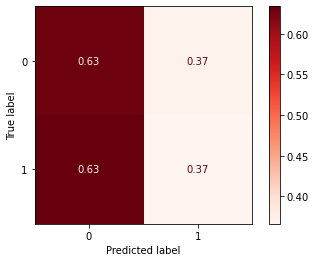

In [49]:
## Check the confusion matrix
metrics.plot_confusion_matrix(model, X_test_tf,y_test,cmap='Reds',normalize='true')

> But accuracy isn't the best metric when you have imbalanced classes. 
- Next class we will introduce more classification metrics

### BOOKMARK: Testing Annotating Conf Matrix

              precision    recall  f1-score   support

           0       0.78      0.89      0.83       167
           1       0.76      0.57      0.66       101

    accuracy                           0.77       268
   macro avg       0.77      0.73      0.74       268
weighted avg       0.77      0.77      0.76       268



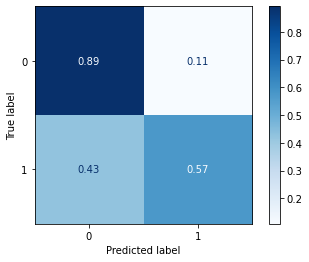

In [73]:
print(metrics.classification_report(y_test,y_hat_test))
cm_fig = metrics.plot_confusion_matrix(log_reg, X_test_tf,y_test,cmap='Blues',normalize='true')#,
ax = cm_fig.ax_
fig = cm_fig.figure_


In [74]:
children = ax.get_children()
text = children[0]
text.get_position()

(0, 0)

Text(0, 0, 'TN')

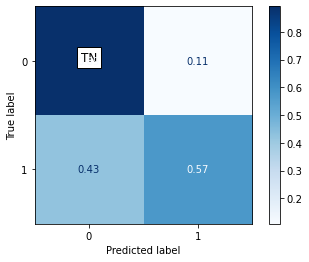

In [115]:
cm_fig = metrics.plot_confusion_matrix(log_reg, X_test_tf,y_test,cmap='Blues',normalize='true')#,
# cm_fig.ax_.annotate('TP',(0.25,0.25),xycoords='axes fraction')


font_params = dict(color='black',ha='center',fontsize="large")

cm_fig.ax_.text(0,0,'TN',fontdict=font_params,zorder=1.,bbox={'fc':'white','alpha':1})


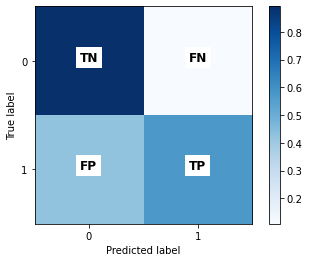

In [122]:
## Labeling quadrants of Conf Matrix
labels = {'TN':(0,0), 
         'FP':(0,1),
         "FN":(1,0),
         "TP":(1,1)}

## Get plot
cm_fig = metrics.plot_confusion_matrix(log_reg, X_test_tf,y_test,cmap='Blues',normalize='true')#,

## Save text and box params
font_params = dict(color='black',ha='center',fontsize="large",fontweight='bold')
box_params ={'fc':'white', 'alpha':1,'ec':'None'}

## Label each quadrant
for label,(x,y) in labels.items():
    
    cm_fig.ax_.text(x,y,label, fontdict=font_params,
                    zorder=100,bbox=box_params)


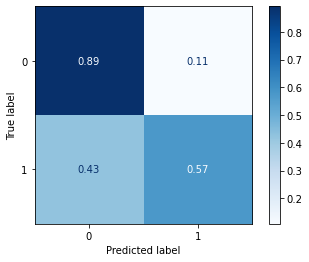

In [90]:
cm_fig.figure_

# Intro to Part 2: Classification Metrics / Evaluating Classifiers 

> [The 5 Classification Evaluation metrics every Data Scientist must know](https://towardsdatascience.com/the-5-classification-evaluation-metrics-you-must-know-aa97784ff226)

## Evaluation Metrics

### Accuracy

$$ \large \text{Accuracy} = \frac{\text{Number of True Positives + True Negatives}}{\text{Total Observations}} $$

> "Out of all the predictions our model made, what percentage were correct?"
- "Accuracy is the most common metric for classification. It provides a solid holistic view of the overall performance of our 
model."

#### When to use?
- **Accuracy** is good for non-technical audiences (but can be misleading with imbalanced classes)


In [51]:
metrics.accuracy_score(y_test, y_hat_test)

0.7723880597014925

### Precision

> "**_Precision_** measures what proportion of predicted Positives is truly Positive?


$$ \large \text{Precision} = \frac{\text{Number of True Positives}}{\text{Number of Predicted Positives}} $$


#### When to use?
- **Use precision** when the cost of acting is high and acting on a positive is costly.
   - e.g. Allocating resources/interventions for prisoners who are at-risk for recidivism. 

In [52]:
metrics.precision_score(y_test, y_hat_test)

0.7631578947368421

### Recall

> **_Recall_** indicates what percentage of the classes we're interested in were actually captured by the model."
$$ \large \text{Recall} = \frac{\text{Number of True Positives}}{\text{Number of Actual Total Positives}} $$ 


#### When to use?
- **Use recall** when the number of true positives/opportunities is small and you don’t want to miss one.
    - e.g. cancer diagnosis. (telling someone they do not have cancer when they actually do is fatal)

In [53]:
metrics.recall_score(y_test, y_hat_test)

0.5742574257425742

<img src='https://raw.githubusercontent.com/jirvingphd/fsds_100719_cohort_notes/master/images/precisionrecall.png' width=50%>

### $F_1$ Score

F1 score represents the **_Harmonic Mean of Precision and Recall_**.  In short, this means that the F1 score cannot be high without both precision and recall also being high. When a model's F1 score is high, you know that your model is doing well all around. 

> Harmonic Mean: "the reciprocal of the arithmetic mean of the reciprocals of a given set of observatins." - *[Wikipedia](https://en.wikipedia.org/wiki/Harmonic_mean)*

#### Arithmetic Mean:

$$\large \bar{X} = \frac{a+b+c}{n} $$

#### Harmonic Mean:

$$ \large \bar{X} = \frac{n}{\frac{1}{a}+ \frac{1}{b}+ \frac{1}{c}}$$


**The formula for F1 score is:**

> $$ \text{F1 score} =  \frac{2}{\text{Precision}^{-1}\ x\ \text{Recall}^{-1}}= 2\ \frac{\text{Precision}\ x\ \text{Recall}}{\text{Precision} + \text{Recall}} $$

#### When to use?
- **F1 score** is really the most informative about overall model quality.
- BUT is the most difficult to express to a non-tech audience

## Which metric to use?

- **When in doubt, use them all!** 
 -`metrics.classification_report`
 

In [54]:
print(metrics.classification_report(y_test,y_hat_test,target_names=['Died','Survived']))

              precision    recall  f1-score   support

        Died       0.78      0.89      0.83       167
    Survived       0.76      0.57      0.66       101

    accuracy                           0.77       268
   macro avg       0.77      0.73      0.74       268
weighted avg       0.77      0.77      0.76       268



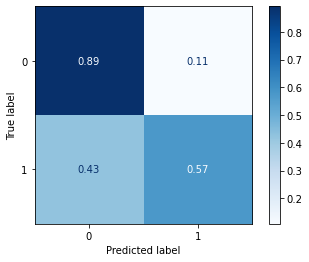

In [55]:
metrics.plot_confusion_matrix(log_reg, X_test_tf,y_test,cmap='Blues',normalize='true')#,


In [56]:
metrics.recall_score(y_test, y_hat_test).round(2)

0.57

- **But some good rules of thumb:**
    - **Accuracy** is good for non-technical audiences (but can be misleading with imbalanced classes)
    
    - **Use recall** when the number of true positives/opportunities is small and you don’t want to miss one.
        - e.g. cancer diagnosis. (telling someone they do not have cancer when they actually do is fatal)
    - **Use precision** when the cost of acting is high and acting on a positive is costly.
       - e.g. Allocating resources/interventions for prisoners who are at-risk for recidivism. 

- **F1 score** is really the most informative about overall model quality, but is the most difficult to express to a non-tech audience

# APPENDIX 

## IMPORTANT NOTE ABOUT PACKAGE VERSIONS

### scikit-learn & matplotlib

In [57]:
#### scikit-learn version
## Run COnda List to Verify what versions are installed and how
# %conda list scikit-learn

- You will need sklearn to be version 0.23 + to have all of the tools covered in lessons.
    > Note: sklearn is listed as `scikit-learn`<br>to update: 
    `conda update scikit-learn`
 

In [58]:
## If have less than 0.23, run this command
# %conda update scikit-learn

In [59]:
#### matplotlib version
# %conda list matplotlib

- You will want to update matplotlib to fix errors with your confusion matrix plots
    > `pip install -U matplotlib`

In [60]:
# !pip install -U matplotlib